In [10]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [11]:
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

In [13]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
model=DBSCAN(eps=0.8, #隣接点と見なす2点間の最大距離
            min_samples=19, #ボーダー点の最小個数
            metric='euclidean'  #距離の計算方法
            ).fit(iris.data)
print(model)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=19, n_jobs=None, p=None)


In [15]:
outliers_df=iris.data

In [16]:
print(Counter(model.labels_))

Counter({1: 94, 0: 50, -1: 6})


In [17]:
print(outliers_df[model.labels_==-1])

[[5.1 2.5 3.  1.1]
 [7.6 3.  6.6 2.1]
 [7.7 3.8 6.7 2.2]
 [7.7 2.6 6.9 2.3]
 [7.7 2.8 6.7 2. ]
 [7.9 3.8 6.4 2. ]]


Text(0.5, 1.0, 'DBSCAN for Outliner Detection')

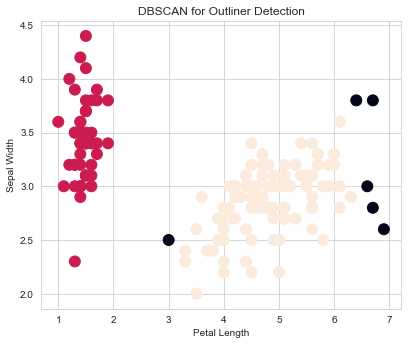

In [18]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1,1])
colors=model.labels_
ax.scatter(
    iris.data[:,2],
    iris.data[:,1],
    c=colors,
    s=120
          )

ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('DBSCAN for Outliner Detection')

In [28]:
from kmodes.kmodes import KModes
import numpy as np

In [29]:
data = np.c_[iris['data'], iris['target']]

In [31]:
kp = KModes(n_clusters=3, init='Huang', n_init=1, verbose=True)
kp.fit_predict(data, categorical=[4])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38, cost: 476.0
Run 1, iteration: 2/100, moves: 16, cost: 475.0
Run 1, iteration: 3/100, moves: 0, cost: 475.0


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2], dtype=uint16)

In [32]:
print(kp.cluster_centroids_)
print(kp.labels_)

[[6.3 3.  4.5 1.3 1. ]
 [5.1 3.4 1.5 0.2 0. ]
 [6.7 3.  5.1 1.8 2. ]]
[1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2
 1 2]


NameError: name 'df' is not defined